Load required libraries

In [1]:
%%capture
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
train_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_train"
test_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_test"


In [ ]:
(X_train,X_test,y_train,)

Load images with TensorFlow

In [6]:
data = tf.keras.utils.image_dataset_from_directory(train_path,image_size=(256,256),batch_size=16,shuffle=True,color_mode='rgb')

Found 13116 files belonging to 6 classes.


In [7]:
test_data =tf.keras.utils.image_dataset_from_directory(test_path,image_size=(256,256),batch_size=16,shuffle=True,color_mode='rgb')

Found 2811 files belonging to 6 classes.


In [8]:
# Load train + validation data from the same train_path
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=0.2,   # 20% for validation
    subset="training",      # Training subset
    seed=123,               # For reproducibility
    image_size=(256, 256),
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

val_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=0.2,   # Same split %
    subset="validation",    # Validation subset
    seed=123,
    image_size=(256, 256),
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

# Load test data
test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(256, 256),
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

Found 13116 files belonging to 6 classes.
Using 10493 files for training.
Found 13116 files belonging to 6 classes.
Using 2623 files for validation.
Found 2811 files belonging to 6 classes.


To access the pipeline

In [7]:
data_iterator =data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002241A921A90>)

In [8]:
batch = data_iterator.next()
len(batch)   # images and labels

2

In [9]:
# Images represented as numpy array
batch[0].shape

(16, 256, 256, 3)

Look at a few pictures

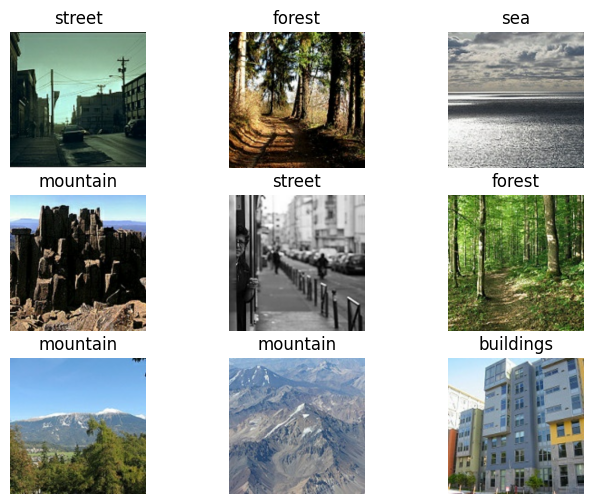

In [9]:
class_names = train_data.class_names

plt.figure(figsize=(8,6))
for image,labels in train_data.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

# Preprocess the data

In [10]:
for i, batch in enumerate(train_data.take(3)):
    # Do something with the batch
    print(f"Batch {i} shape:", batch)  # This will usually be a tuple (images, labels)

    first_three_batches = []

for batch in train_data.take(3):
    first_three_batches.append(batch)

Batch 0 shape: (<tf.Tensor: shape=(16, 256, 256, 3), dtype=float32, numpy=
array([[[[ 38.       ,  92.       , 180.       ],
         [ 38.       ,  92.       , 180.       ],
         [ 38.       ,  92.       , 180.       ],
         ...,
         [ 33.71875  ,  85.71875  , 171.71875  ],
         [ 29.03125  ,  81.03125  , 167.03125  ],
         [ 26.       ,  78.       , 164.       ]],

        [[ 38.       ,  92.       , 180.       ],
         [ 38.14357  ,  92.14357  , 180.14357  ],
         [ 38.365585 ,  92.365585 , 180.36559  ],
         ...,
         [ 34.097656 ,  86.09766  , 172.09766  ],
         [ 29.410156 ,  81.41016  , 167.41016  ],
         [ 26.378906 ,  78.37891  , 164.3789   ]],

        [[ 38.       ,  92.       , 180.       ],
         [ 38.365585 ,  92.365585 , 180.36559  ],
         [ 38.930923 ,  92.93092  , 180.93092  ],
         ...,
         [ 34.683594 ,  86.68359  , 172.6836   ],
         [ 29.996094 ,  81.99609  , 167.9961   ],
         [ 26.964844 ,  78.96

In [11]:
first_three_batches[0:3]

[(<tf.Tensor: shape=(16, 256, 256, 3), dtype=float32, numpy=
  array([[[[2.04000000e+02, 2.25000000e+02, 2.18000000e+02],
           [2.00968750e+02, 2.21968750e+02, 2.14968750e+02],
           [1.96281250e+02, 2.17281250e+02, 2.10281250e+02],
           ...,
           [1.60140625e+02, 2.17140625e+02, 2.28140625e+02],
           [1.62484375e+02, 2.19484375e+02, 2.30484375e+02],
           [1.64000000e+02, 2.21000000e+02, 2.32000000e+02]],
  
          [[1.99453125e+02, 2.20453125e+02, 2.14210938e+02],
           [1.97283295e+02, 2.18570435e+02, 2.12184677e+02],
           [1.93927887e+02, 2.15659058e+02, 2.09051285e+02],
           ...,
           [1.41096146e+02, 2.01885208e+02, 2.14779739e+02],
           [1.48102219e+02, 2.08891281e+02, 2.21785812e+02],
           [1.52632812e+02, 2.13421875e+02, 2.26316406e+02]],
  
          [[1.92421875e+02, 2.13421875e+02, 2.08351562e+02],
           [1.91584137e+02, 2.13315308e+02, 2.07879410e+02],
           [1.90288666e+02, 2.13150513e+02, 2

scale the data

In [12]:
data = train_data.map(lambda x,y: (x/255, y))

In [13]:
scaled_iterator =  data.as_numpy_iterator()

In [14]:
batch = scaled_iterator.next()

In [15]:
print(batch[0].max())

1.0


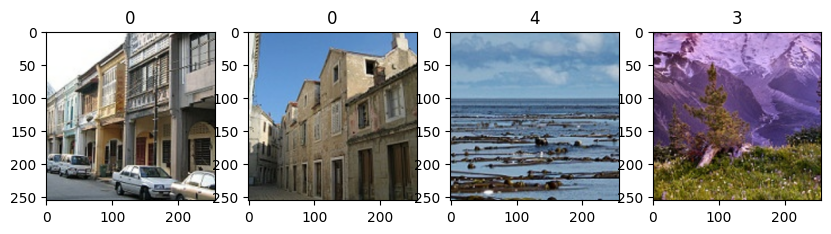

In [16]:
fig,ax = plt.subplots(ncols=4, figsize=(10,8))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Deep model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='softmax'))

c:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,910 (14.11 MB)

 Trainable params: 3,697,910 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [22]:
logdir='logs'

In [23]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir='logdir')

In [24]:
hist=model.fit(data,epochs=15,validation_data=val_data,callbacks=[tensorboard_callback])

Epoch 1/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 115s 171ms/step - accuracy: 0.6063 - loss: 1.0091 - val_accuracy: 0.5852 - val_loss: 158.4177
Epoch 2/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 103s 157ms/step - accuracy: 0.7371 - loss: 0.6942 - val_accuracy: 0.6538 - val_loss: 136.3768
Epoch 3/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 98s 149ms/step - accuracy: 0.8178 - loss: 0.4896 - val_accuracy: 0.6599 - val_loss: 185.1684
Epoch 4/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 135s 205ms/step - accuracy: 0.8862 - loss: 0.3130 - val_accuracy: 0.6443 - val_loss: 255.3097
Epoch 5/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 146s 222ms/step - accuracy: 0.9295 - loss: 0.2033 - val_accuracy: 0.6813 - val_loss: 263.6755
Epoch 6/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 143s 217ms/step - accuracy: 0.9568 - loss: 0.1291 - val_accuracy: 0.6676 - val_loss: 306.0219
Epoch 7/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 144s 219ms/step - accuracy: 0.9695 - loss: 0.0989 - val_accuracy: 0.6824 - val_loss: 341.7206
Epoch 8/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 142s 217ms/step - accur

In [25]:
# Evaluate model on validation set
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

164/164 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6317 - loss: 512.0579
Validation Accuracy: 0.6317, Validation Loss: 512.0579
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.6329 - loss: 503.8837
Test Accuracy: 0.6329, Test Loss: 503.8837


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step
              precision    recall  f1-score   support

           0       0.16      0.21      0.18       431
           1       0.17      0.19      0.18       474
           2       0.21      0.32      0.26       525
           3       0.17      0.13      0.15       468
           4       0.12      0.05      0.07       419
           5       0.16      0.13      0.14       494

    accuracy                           0.18      2811
   macro avg       0.17      0.17      0.16      2811
weighted avg       0.17      0.18      0.17      2811

Confusion Matrix:
 [[ 91  83 121  52  29  55]
 [ 88  88 131  67  32  68]
 [ 93  86 168  59  45  74]
 [103  85 126  61  31  62]
 [101  72 110  49  22  65]
 [102  98 129  72  30  63]]


In [28]:
import tensorflow as tf
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing import image

# Define your class names (must match your dataset order)
class_names = train_data.class_names   # automatically taken from your dataset

# Prediction function
def predict_image(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

    # Predict
    preds = model.predict(img_array)
    pred_class = class_names[np.argmax(preds)]
    confidence = np.max(preds)

    return {class_names[i]: float(preds[0][i]) for i in range(len(class_names))}, f"Prediction: {pred_class} ({confidence:.2f})"

# Gradio UI
demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="filepath", label="Upload Image"),
    outputs=[
        gr.Label(num_top_classes=3, label="Predicted Probabilities"),
        gr.Textbox(label="Prediction Result")
    ],
    title="Intel Image Classification",
    description="Upload an image and the model will classify it into one of the categories."
)

# Launch Gradio app
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://03616b753ed275474d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
